# Exercise 4 : Linear Regression

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Predicting SalePrice using GrLivArea

Extract the required variables from the dataset, as mentioned in the problem.     

In [3]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

Plot `houseSalePrice` against `houseGrLivArea` using standard JointPlot.

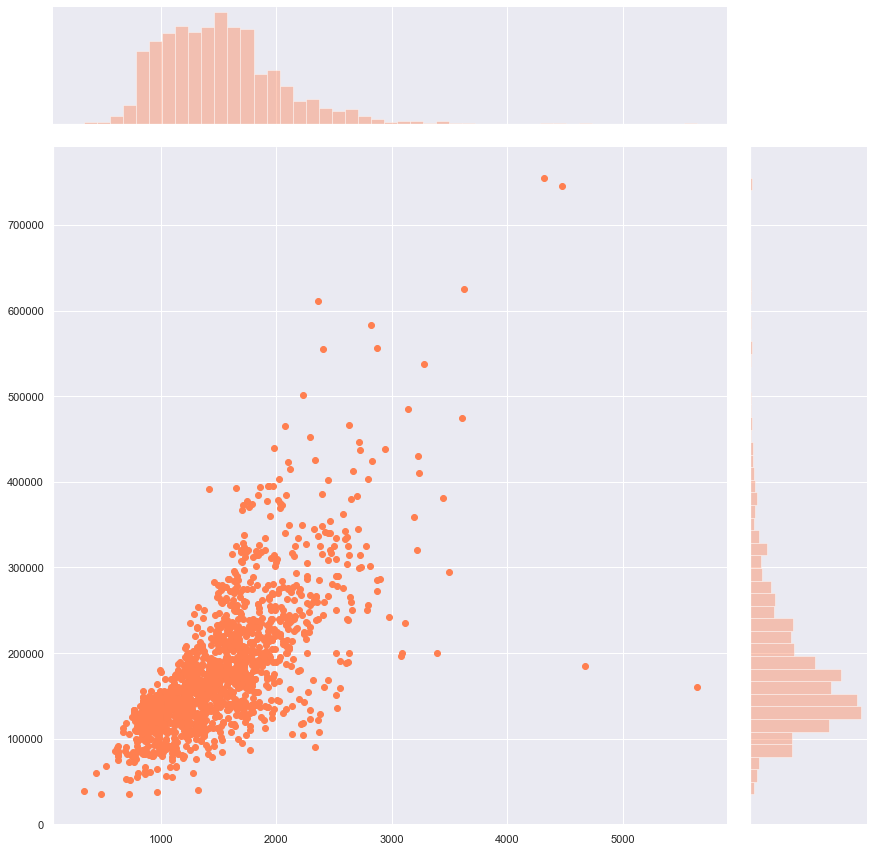

In [4]:
sb.jointplot(houseGrLivArea, houseSalePrice, height = 12, color = "coral")

Import the `LinearRegression` model from `sklearn.linear_model`.

In [5]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a Linear Regression object
linreg = LinearRegression()

Prepare both the datasets by splitting in Train and Test sets.   
Train Set with 1100 samples and Test Set with 360 samples.

In [6]:
# Split the dataset into Train and Test       
#houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
#houseGrLivArea_test  = pd.DataFrame(houseGrLivArea[-360:])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
#houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
houseGrLivArea_train, houseGrLivArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


Fit Linear Regression model on `houseGrLivArea_train` and `houseSalePrice_train`

In [7]:
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Check the coefficients of the Linear Regression model you just fit.

In [8]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [17042.20762161]
Coefficients 	: a =  [[109.07049048]]


Plot the regression line based on the coefficients-intercept form.

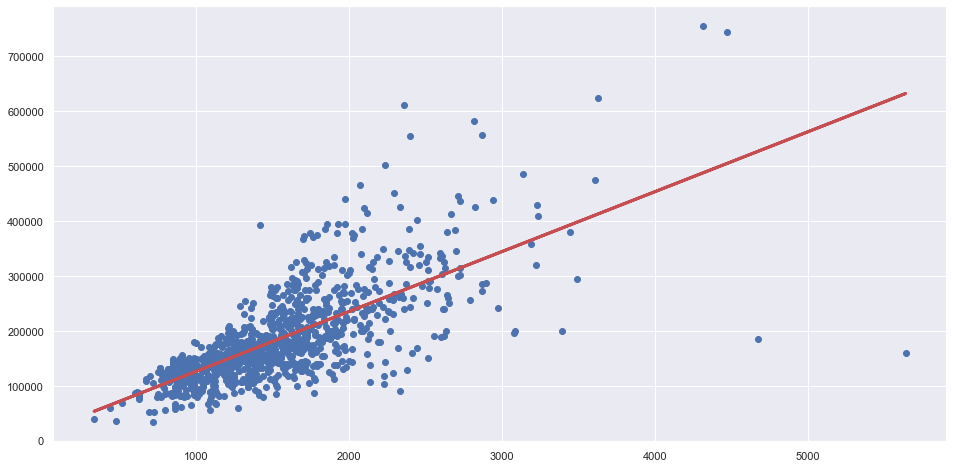

In [9]:
# Formula for the Regression line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Prediction of Response based on the Predictor

Predict `SalePrice` given `GrLivArea` in the Test dataset.

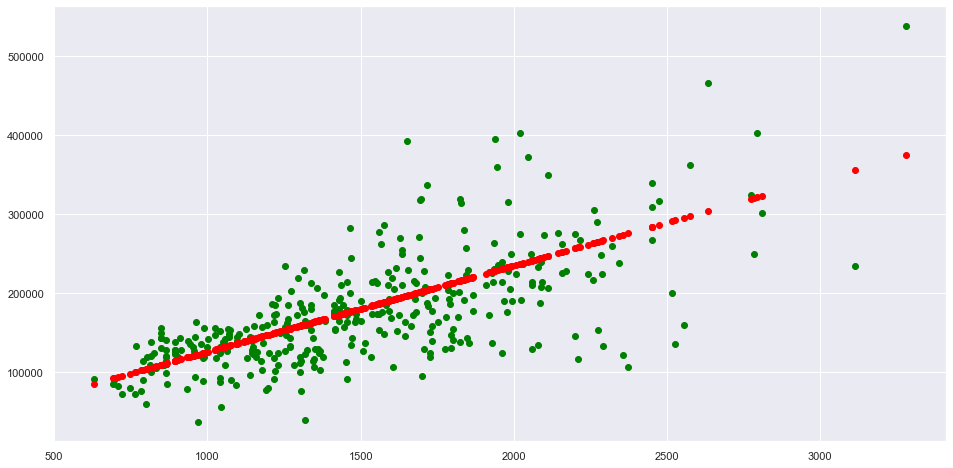

In [10]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.

In [11]:
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))

Explained Variance (R^2) 	: 0.5111849172578952


Check how good the predictions are on the Test Set.    
Metric : Explained Variance or R^2 on the Test Set.

In [12]:
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

Explained Variance (R^2) 	: 0.4558982694583925


#### You should also try the following

* Convert `SalePrice` to `log(SalePrice)` in the beginning and then use it for Regression     
  Code : `houseSalePrice = pd.DataFrame(np.log(houseData['SalePrice']))`    
  
* Perform a *Random Train-Test Split* on the dataset before you start with the Regression      
  Note : Check the preparation notebook `M3 LinearRegression.ipynb` for the code

---

## Problem 2 : Predicting SalePrice using LotArea

Extract the required variables from the dataset, as mentioned in the problem.     

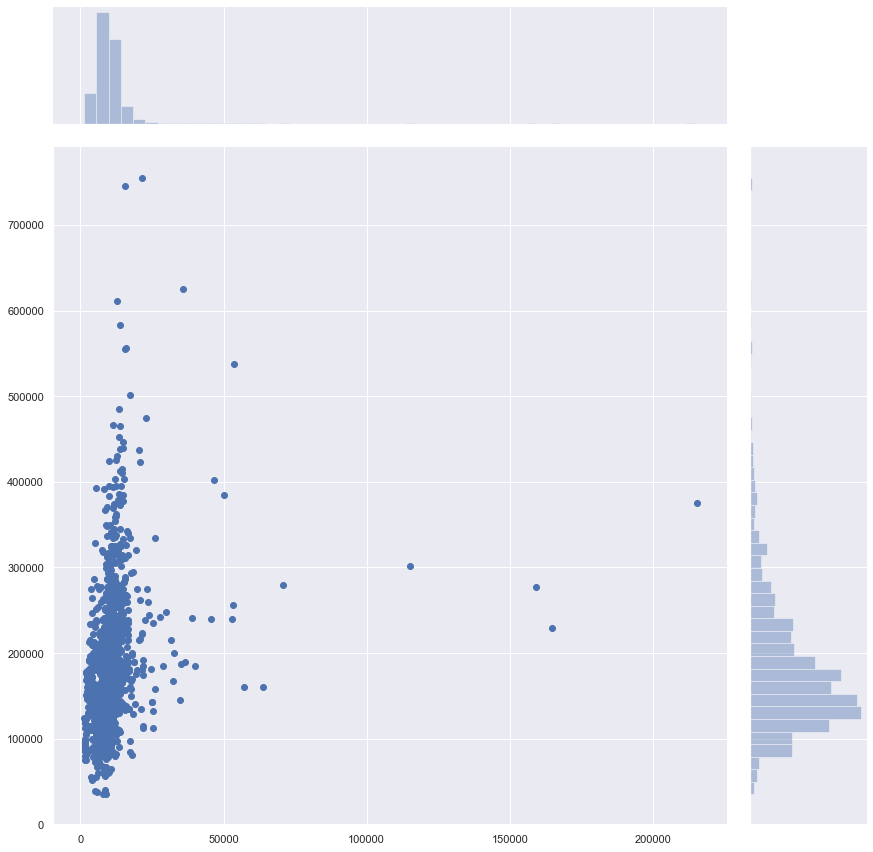

In [13]:
housePredictor = pd.DataFrame(houseData['LotArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
sb.jointplot(housePredictor, houseSalePrice, height = 12)

#### Linear Regression on SalePrice vs Predictor

In [14]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
#housePredictor_train = pd.DataFrame(housePredictor[:1100])
#housePredictor_test  = pd.DataFrame(housePredictor[-360:])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
#houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
housePredictor_train, housePredictor_test, houseSalePrice_train, houseSalePrice_test = train_test_split(housePredictor, houseSalePrice, test_size = 360/1460)


# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [163283.13228005]
Coefficients 	: a =  [[1.71871737]]


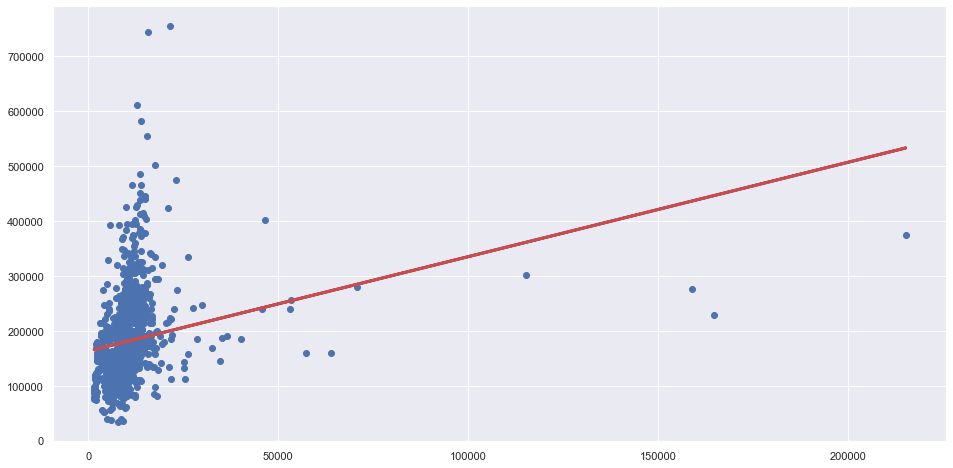

In [15]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = housePredictor_train
regline_y = linreg.intercept_ + linreg.coef_ * housePredictor_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Prediction of Response based on the Predictor

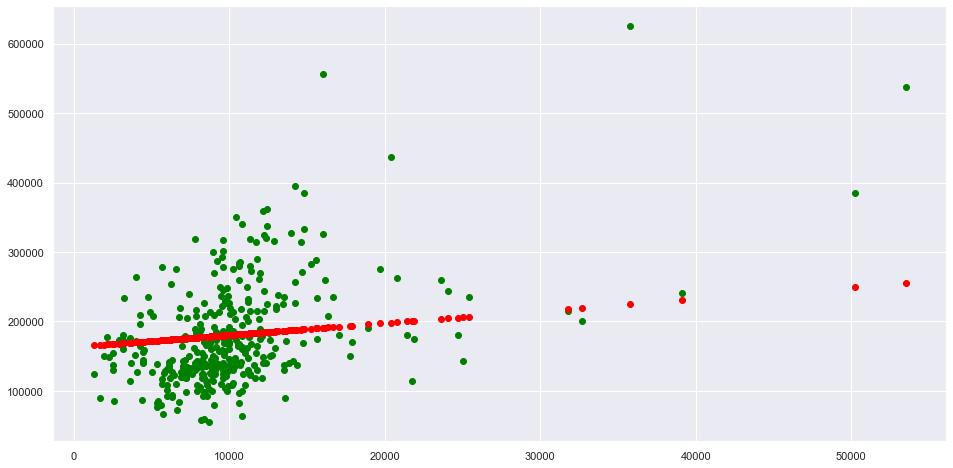

In [16]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_test, houseSalePrice_test, color = "green")
plt.scatter(housePredictor_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [17]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

Explained Variance (R^2) on Train Set 	: 0.0551471254990723
Explained Variance (R^2) on Test Set 	: 0.10929113803979718


---

## Problem 2 : Predicting SalePrice using TotalBsmtSF

Extract the required variables from the dataset, as mentioned in the problem.     

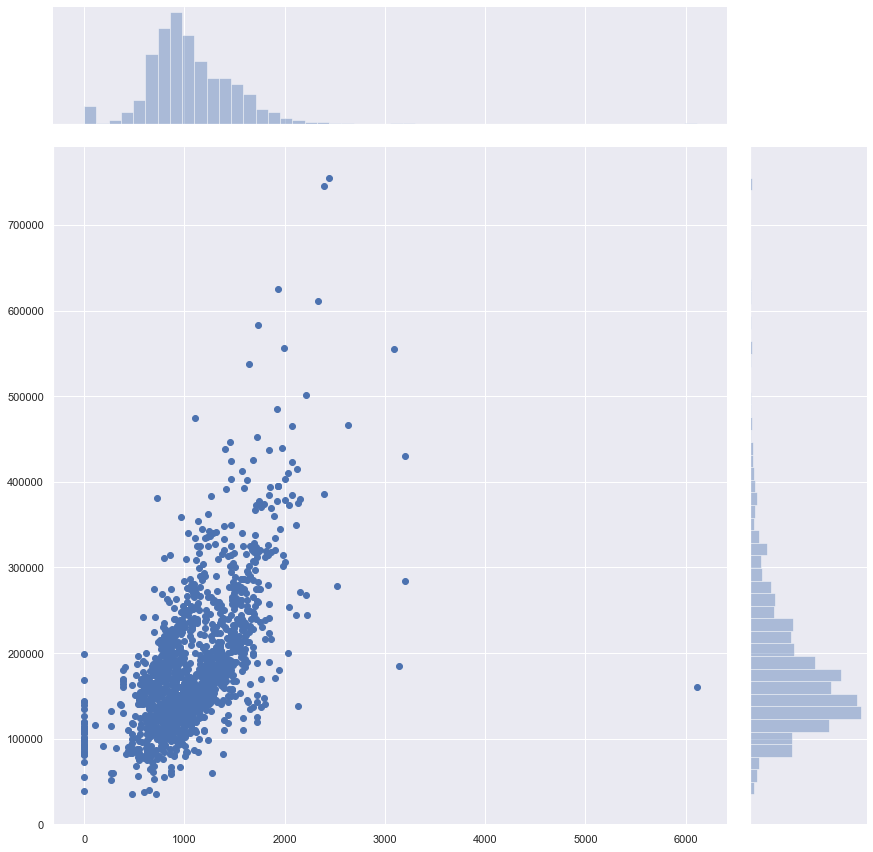

In [18]:
housePredictor = pd.DataFrame(houseData['TotalBsmtSF'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
sb.jointplot(housePredictor, houseSalePrice, height = 12)

#### Linear Regression on SalePrice vs Predictor

In [19]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
#housePredictor_train = pd.DataFrame(housePredictor[:1100])
#housePredictor_test  = pd.DataFrame(housePredictor[-360:])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
#houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
housePredictor_train, housePredictor_test, houseSalePrice_train, houseSalePrice_test = train_test_split(housePredictor, houseSalePrice, test_size = 360/1460)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [69067.07950402]
Coefficients 	: a =  [[105.00523537]]


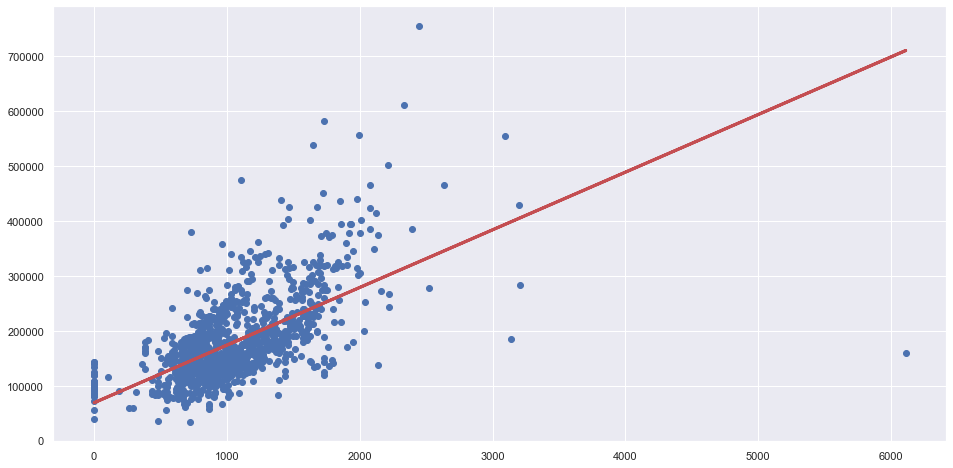

In [20]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = housePredictor_train
regline_y = linreg.intercept_ + linreg.coef_ * housePredictor_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Prediction of Response based on the Predictor

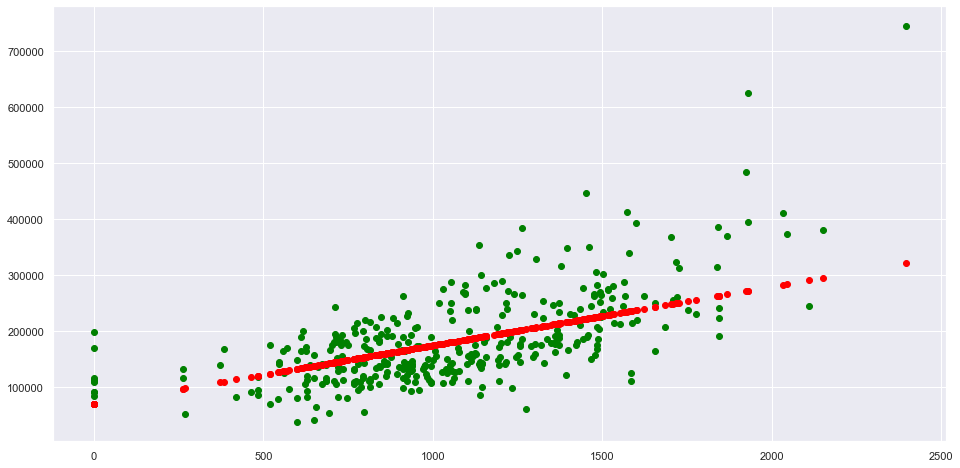

In [21]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_test, houseSalePrice_test, color = "green")
plt.scatter(housePredictor_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [22]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

Explained Variance (R^2) on Train Set 	: 0.3664617006969989
Explained Variance (R^2) on Test Set 	: 0.39860676297476794


---

## Problem 2 : Predicting SalePrice using GarageArea

Extract the required variables from the dataset, as mentioned in the problem.     

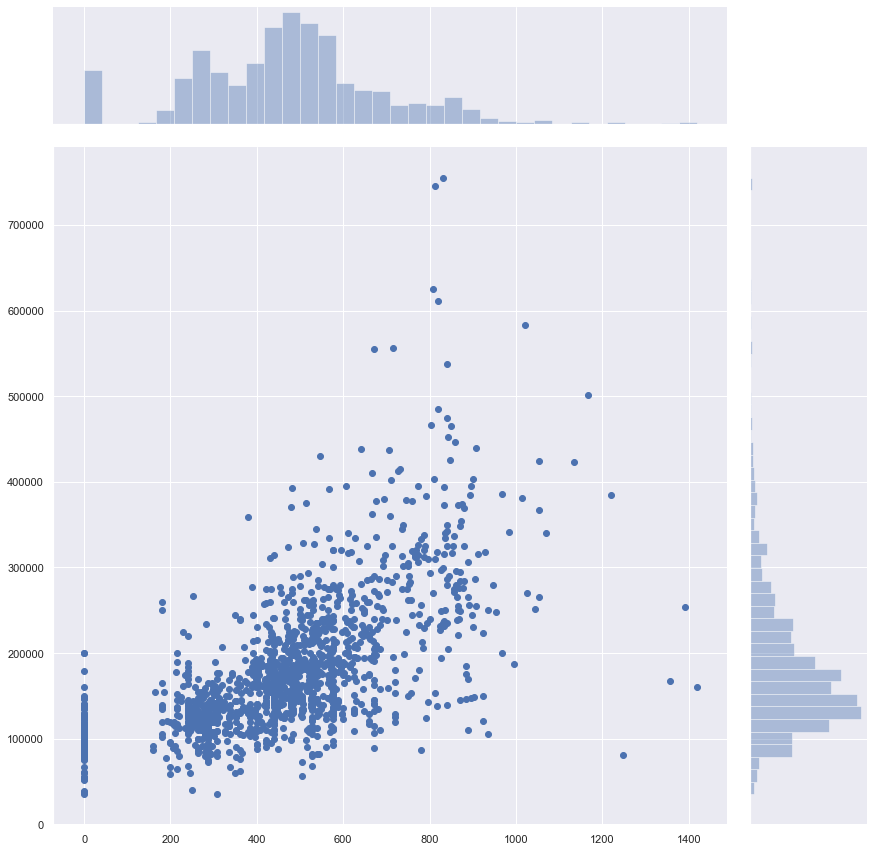

In [23]:
housePredictor = pd.DataFrame(houseData['GarageArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
sb.jointplot(housePredictor, houseSalePrice, height = 12)

#### Linear Regression on SalePrice vs Predictor

In [24]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
#housePredictor_train = pd.DataFrame(housePredictor[:1100])
#housePredictor_test  = pd.DataFrame(housePredictor[-360:])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
#houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
housePredictor_train, housePredictor_test, houseSalePrice_train, houseSalePrice_test = train_test_split(housePredictor, houseSalePrice, test_size = 360/1460)


# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [70683.03185037]
Coefficients 	: a =  [[233.6352608]]


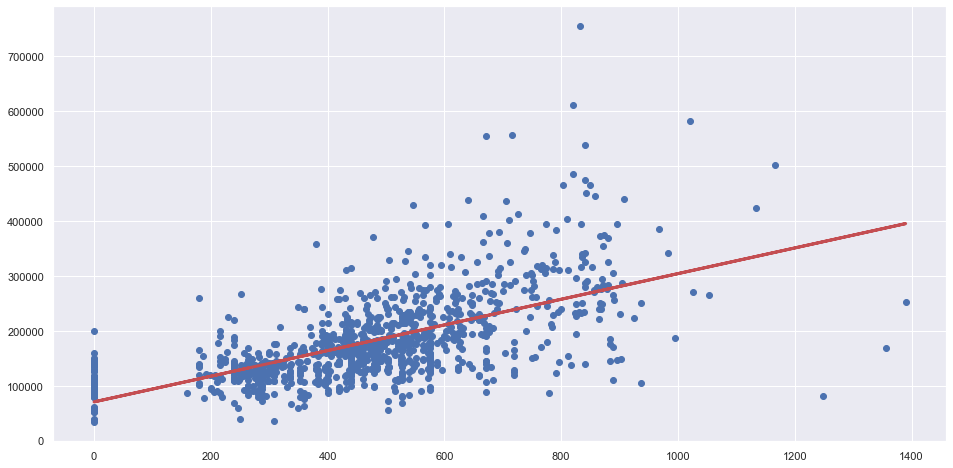

In [25]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = housePredictor_train
regline_y = linreg.intercept_ + linreg.coef_ * housePredictor_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Prediction of Response based on the Predictor

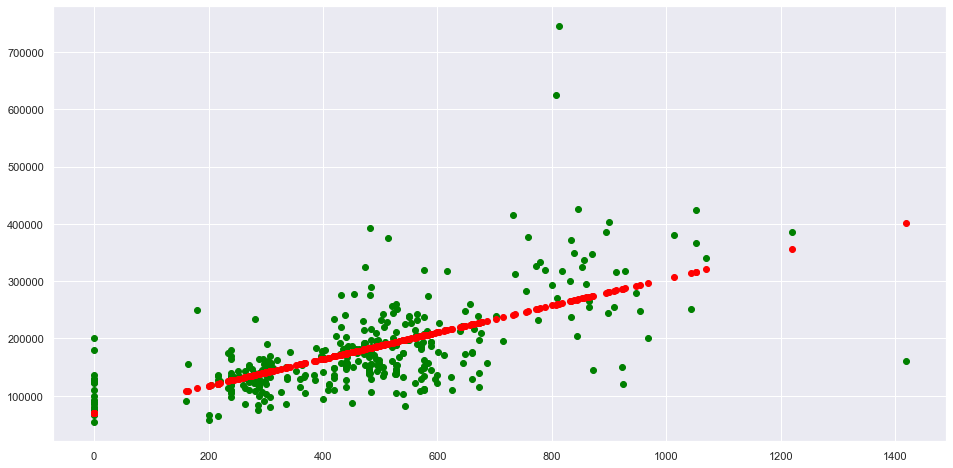

In [26]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_test, houseSalePrice_test, color = "green")
plt.scatter(housePredictor_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [27]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

Explained Variance (R^2) on Train Set 	: 0.38419120498480697
Explained Variance (R^2) on Test Set 	: 0.40185431690247186


---

## Extra : Predicting SalePrice using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression.     

In [28]:
housePredictor = pd.DataFrame(houseData[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

#### Linear Regression on SalePrice vs Predictor

In [29]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
#housePredictor_train = pd.DataFrame(housePredictor[:1100])
#housePredictor_test  = pd.DataFrame(housePredictor[-360:])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
#houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
housePredictor_train, housePredictor_test, houseSalePrice_train, houseSalePrice_test = train_test_split(housePredictor, houseSalePrice, test_size = 360/1460)


# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

LinearRegression()

#### Coefficients of the Linear Regression Model

Note that you CANNOT visualize the model as a line on a 2D plot, as it is a multi-dimensional surface.

In [30]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-17355.59710681]
Coefficients 	: a =  [[ 65.87027926   0.17523035  44.2786554  105.43919735]]


#### Prediction of Response based on the Predictor

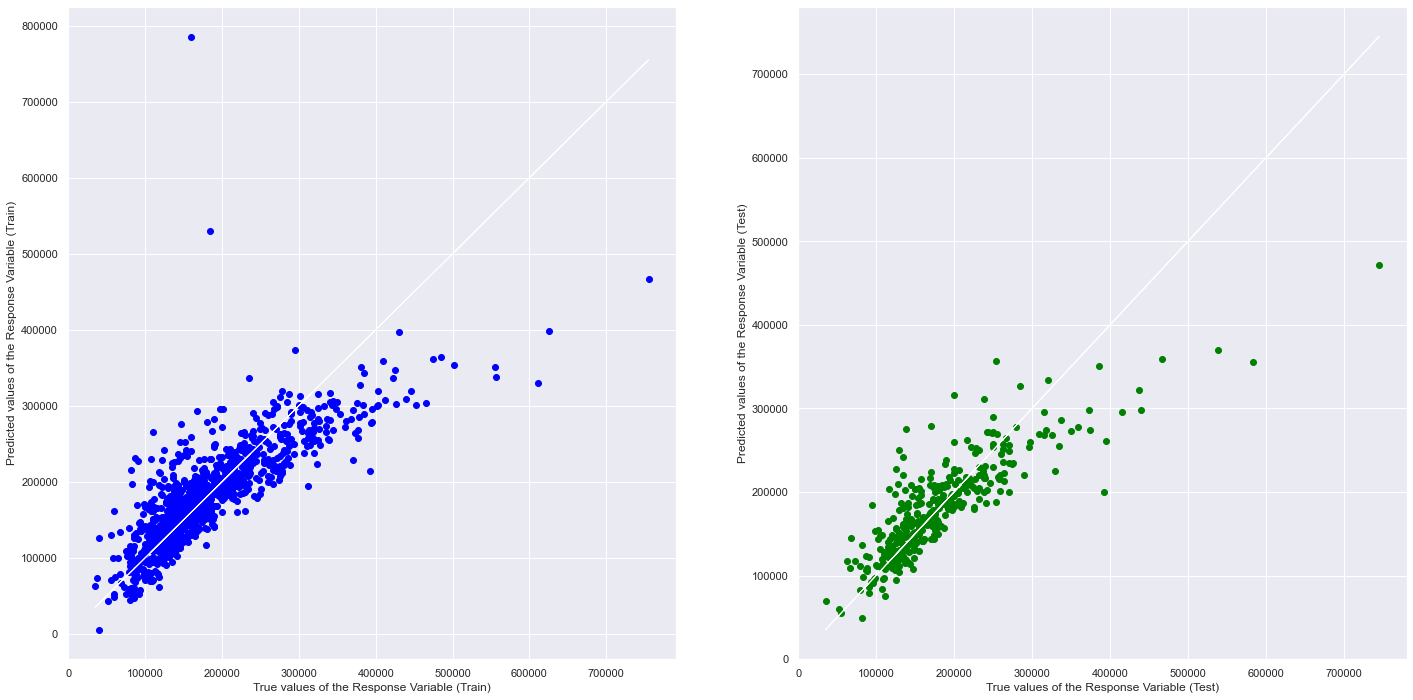

In [31]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_train_pred = linreg.predict(housePredictor_train)
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(houseSalePrice_train, houseSalePrice_train_pred, color = "blue")
axes[0].plot(houseSalePrice_train, houseSalePrice_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(houseSalePrice_test, houseSalePrice_test_pred, color = "green")
axes[1].plot(houseSalePrice_test, houseSalePrice_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [32]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

Explained Variance (R^2) on Train Set 	: 0.647207127617876
Explained Variance (R^2) on Test Set 	: 0.7058094902509824


---

## Interpretation and Discussion

Now that you have performed Linear Regression of `SalePrice` against the four variables `GrLivArea`, `LotArea`, `TotalBsmtSF`, `GarageArea`, compare-and-contrast the Exaplained Variance (R^2) to determine which model is the best in order to predict `SalePrice`. What do you think?